In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/richagautam/opt/anaconda3/lib/python3.7/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
## sklearn basics
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## Decision trees
from sklearn import tree

## Random Forest
from sklearn.ensemble import RandomForestClassifier

## knn
from sklearn.neighbors import KNeighborsClassifier

## SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## kmeans
from sklearn.cluster import KMeans

## grid search
from sklearn.model_selection import GridSearchCV

## pandas
import pandas as pd

## numpy
import numpy as np
from numpy.random import seed
seed(1)

## matplotlib
import matplotlib.pyplot as plt


# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
X = df.drop("koi_disposition", axis=1)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
y = df["koi_disposition"]

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CO

Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
-

Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Ori

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CO

Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded

------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED

Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
-

Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------

------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
---

Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDAT

Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded 

------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE


------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [6]:
# Scale your data

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Since the outcome is categorical, specifically three categories, this is a classification problem. Therefore, the models used will be random forests, knn, svm, kmeans, and neural networks. Hyperparametric tuning will be done using grid search


## Train the model - random forests

In [26]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8489702517162472

In [27]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9004576659038902

In [28]:
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10735078696976894, 'koi_fpflag_co'),
 (0.09290774190858658, 'koi_fpflag_nt'),
 (0.06171250544238683, 'koi_model_snr'),
 (0.05561892096258465, 'koi_fpflag_ss'),
 (0.052109637390760986, 'koi_prad'),
 (0.03653384990199722, 'koi_prad_err2'),
 (0.03330722219957904, 'koi_steff_err1'),
 (0.03250902884931713, 'koi_prad_err1'),
 (0.03235774210627472, 'koi_duration_err2'),
 (0.031482054776049664, 'koi_fpflag_ec'),
 (0.031100472998301223, 'koi_duration_err1'),
 (0.028323802199102924, 'koi_steff_err2'),
 (0.024060699951460783, 'koi_time0bk_err2'),
 (0.023471966334010195, 'koi_time0bk_err1'),
 (0.022513964342725054, 'koi_period'),
 (0.022376138823845676, 'koi_depth'),
 (0.021818999672863007, 'koi_duration'),
 (0.020967158837196787, 'koi_insol_err1'),
 (0.01974044361335372, 'koi_impact'),
 (0.019254236097115674, 'koi_period_err1'),
 (0.016844283499593337, 'koi_insol'),
 (0.01602441432505728, 'koi_teq'),
 (0.015442736803031399, 'koi_insol_err2'),
 (0.015083803560296736, 'koi_period_err2'),
 (0.01

## Train the model - knn

In [29]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
#     print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
#     print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

k: 1, Train/Test Score: 1.000/0.804
k: 3, Train/Test Score: 0.910/0.831
k: 5, Train/Test Score: 0.889/0.832
k: 7, Train/Test Score: 0.880/0.830
k: 9, Train/Test Score: 0.874/0.830
k: 11, Train/Test Score: 0.869/0.831
k: 13, Train/Test Score: 0.865/0.826
k: 15, Train/Test Score: 0.861/0.824
k: 17, Train/Test Score: 0.860/0.824
k: 19, Train/Test Score: 0.856/0.830


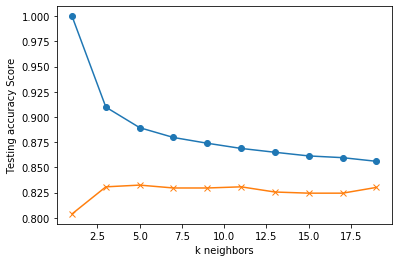

In [30]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.825


## Train the model - Kmeans

In [13]:
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Fit the model to the data
kmeans.fit(X)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)

In [20]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
centers

array([[ 3.40425532e-01,  3.40425532e-01,  4.68085106e-01,
         1.70212766e-01,  1.53058254e+00,  6.10741064e-05,
        -6.10741064e-05,  1.35848227e+02,  7.39758511e-03,
        -7.39758511e-03,  6.04342553e-01,  3.77746809e-01,
        -2.27465957e-01,  3.69719149e+00,  2.96055319e-01,
        -2.96055319e-01,  1.44373404e+03,  1.49085106e+01,
        -1.49085106e+01,  9.01165957e+01,  1.81329787e+01,
        -3.89478723e+01,  4.99902128e+03,  1.58424975e+05,
         8.16567979e+04, -9.04663723e+04,  1.12836170e+02,
         1.10638298e+00,  6.31644681e+03,  1.42638298e+02,
        -2.16744681e+02,  2.76076596e+00,  2.36574468e-01,
        -1.12191489e-01,  1.56941489e+01,  2.57621277e+00,
        -4.35417021e+00,  2.94656621e+02,  4.28933064e+01,
         1.26359149e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.68827160e-01,  2.39000000e-05,
        -2.39000000e-05,  1.31869200e+02,  2.08000000e-02,
        -2.08000000e-02,  5.14

In [ ]:
# Train the model - SVC

In [7]:
model = SVC(kernel='linear')

estimator = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
                max_iter=-1, probability=False, random_state=None, shrinking=True,
                tol=0.001, verbose=False)

In [8]:
# Create the GridSearchCV model
param_grid = {'C': [1, 3, 5],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
grid.fit(X_train, y_train)

/Users/richagautam/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.819, total=72.8min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 72.8min remaining:    0.0s


In [ ]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
             estimator=estimator,
             fit_params=None, iid=True, n_jobs=1,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=3)

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

In [ ]:
predictions = grid.predict(X_test)

print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'best_model.sav'
joblib.dump(your_model, filename)